In [2]:
from pydataset import data
# My py files
import env
import os
import wrangle as w
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
# Array and Dataframes
import numpy as np
import pandas as pd
# Imputer
from sklearn.impute import SimpleImputer
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.cluster import KMeans
    # Modeling: Preprocessing
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler
    # Modeling: Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE
    # Linear: Polynomial
from sklearn.preprocessing import PolynomialFeatures
    # Modeling: Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

In [3]:
iris = data('iris')

In [4]:
w.summarize(iris)

=====   SHAPE   =====
(150, 5)
=====   INFO   =====
<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
=====   DESCRIBE   =====
|              |   count |    mean |      std |   min |   25% |   50% |   75% |   max |
|:-------------|--------:|--------:|---------:|------:|------:|------:|------:|------:|
| Sepal.Length |     150 | 5.84333 | 0.828066 |   4.3 |   5.1 |  5.8  |   6.4 |   7.9 |
| Sepal.Width  |     150 | 3.05733 | 0.435866 |   2   |   2.8 |  3    |   3.3 |   4.4 |
| Petal.Length |     150 | 3.758   | 1.7653   |   1   |   1.6 |  4.35 |   5.1 |   6.9 |
| Petal.Width  |     150 |

In [5]:
new_col_names = []

for col in iris.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
iris.columns = new_col_names
iris

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

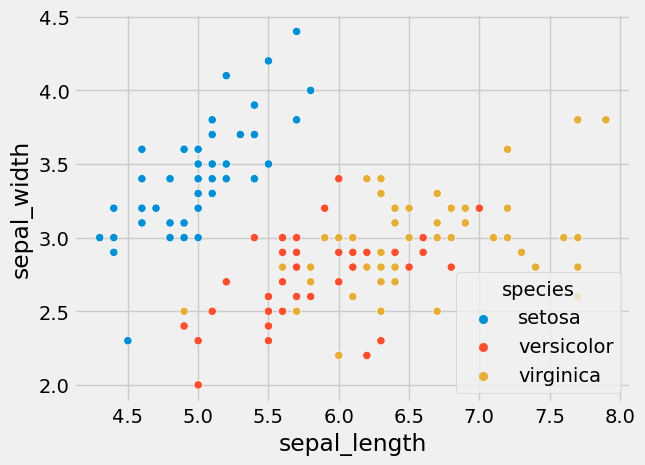

In [7]:
sns.scatterplot(data=iris,x='sepal_length',y='sepal_width',hue='species')

In [11]:
X = iris[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# sepal_clusters = iris[['sepal_length','sepal_width']]

# km.fit(sepal_clusters)
# sepal_c = km.predict(sepal_clusters)

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

### Add cluster to our original data

In [14]:
iris['cluster'] = clusters
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2
4,4.6,3.1,1.5,0.2,setosa,2
5,5.0,3.6,1.4,0.2,setosa,2


### Visualize Clusters

In [16]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,2.00
versicolor,5.936,2.770,4.260,1.326,0.04
virginica,6.588,2.974,5.552,2.026,0.92


[Text(0.5, 1.0, 'K-Means Clusters')]

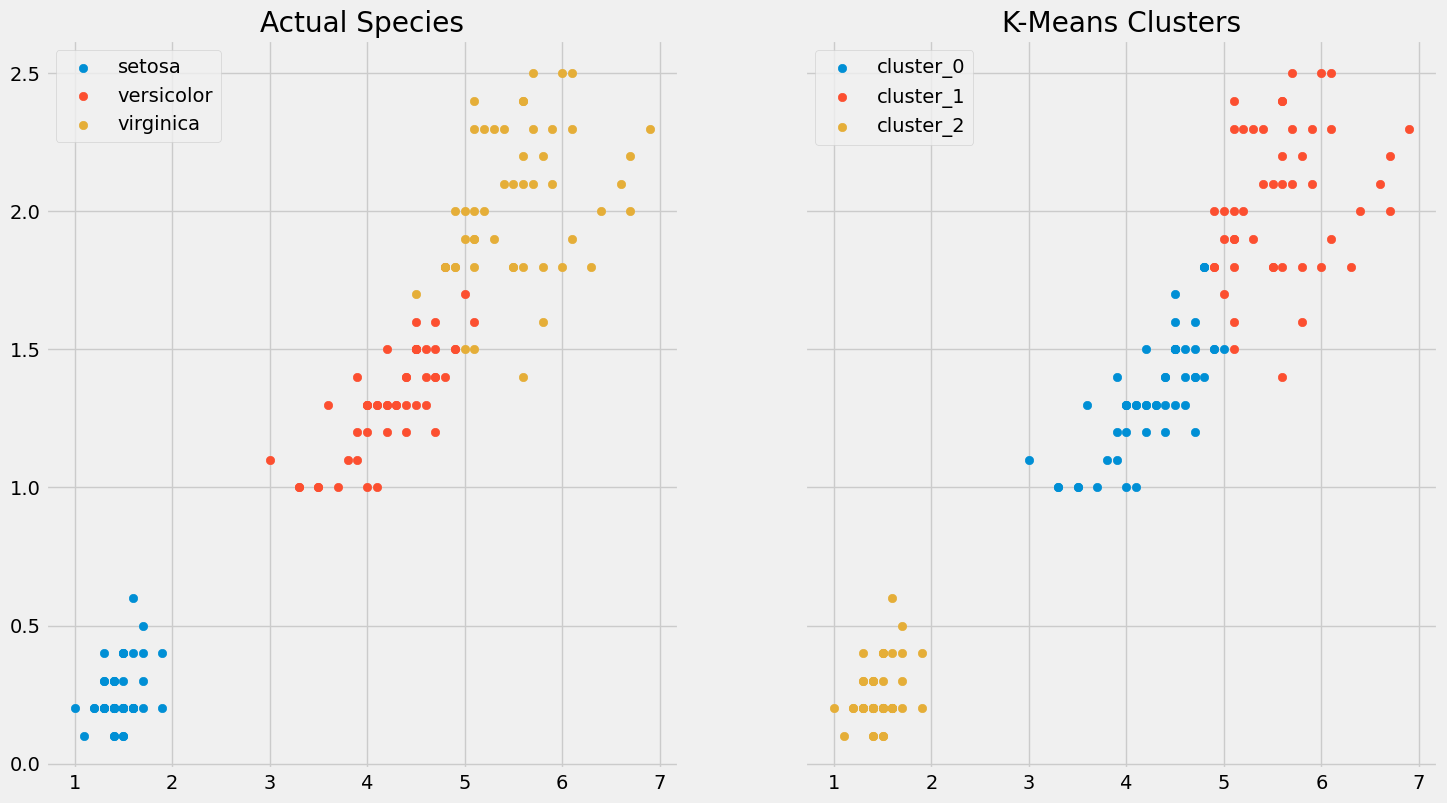

In [18]:
fig, axs = plt.subplots(1, 2, 
                        figsize=(16, 9), 
                        sharex=True, sharey=True)

for species, subset in iris.groupby('species'):
    axs[0].scatter(
        subset.petal_length, 
        subset.petal_width, 
        label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in iris.cluster.sort_values().unique():
    axs[1].scatter(
        iris[iris.cluster == cluster_n].petal_length, 
        iris[iris.cluster == cluster_n].petal_width, 
        label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

### Use elbow method to determine cluster number

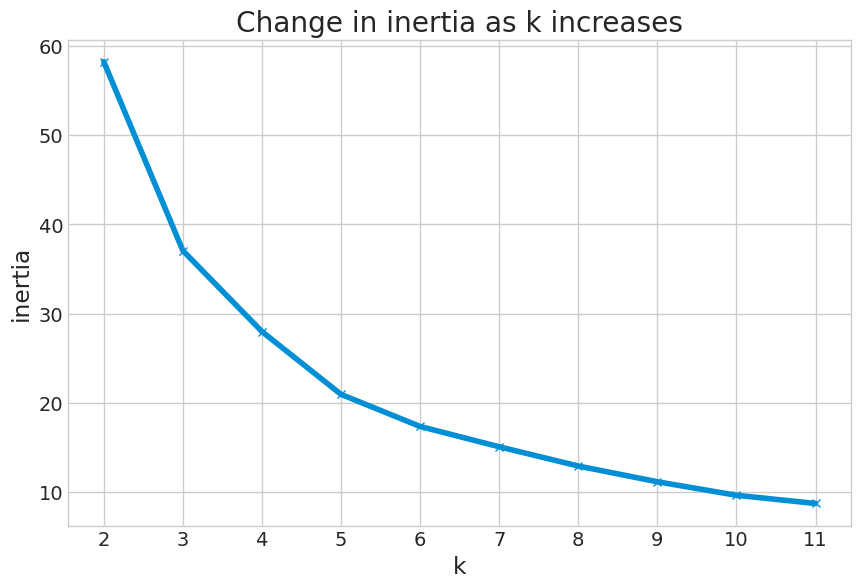

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(sepal_clusters).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


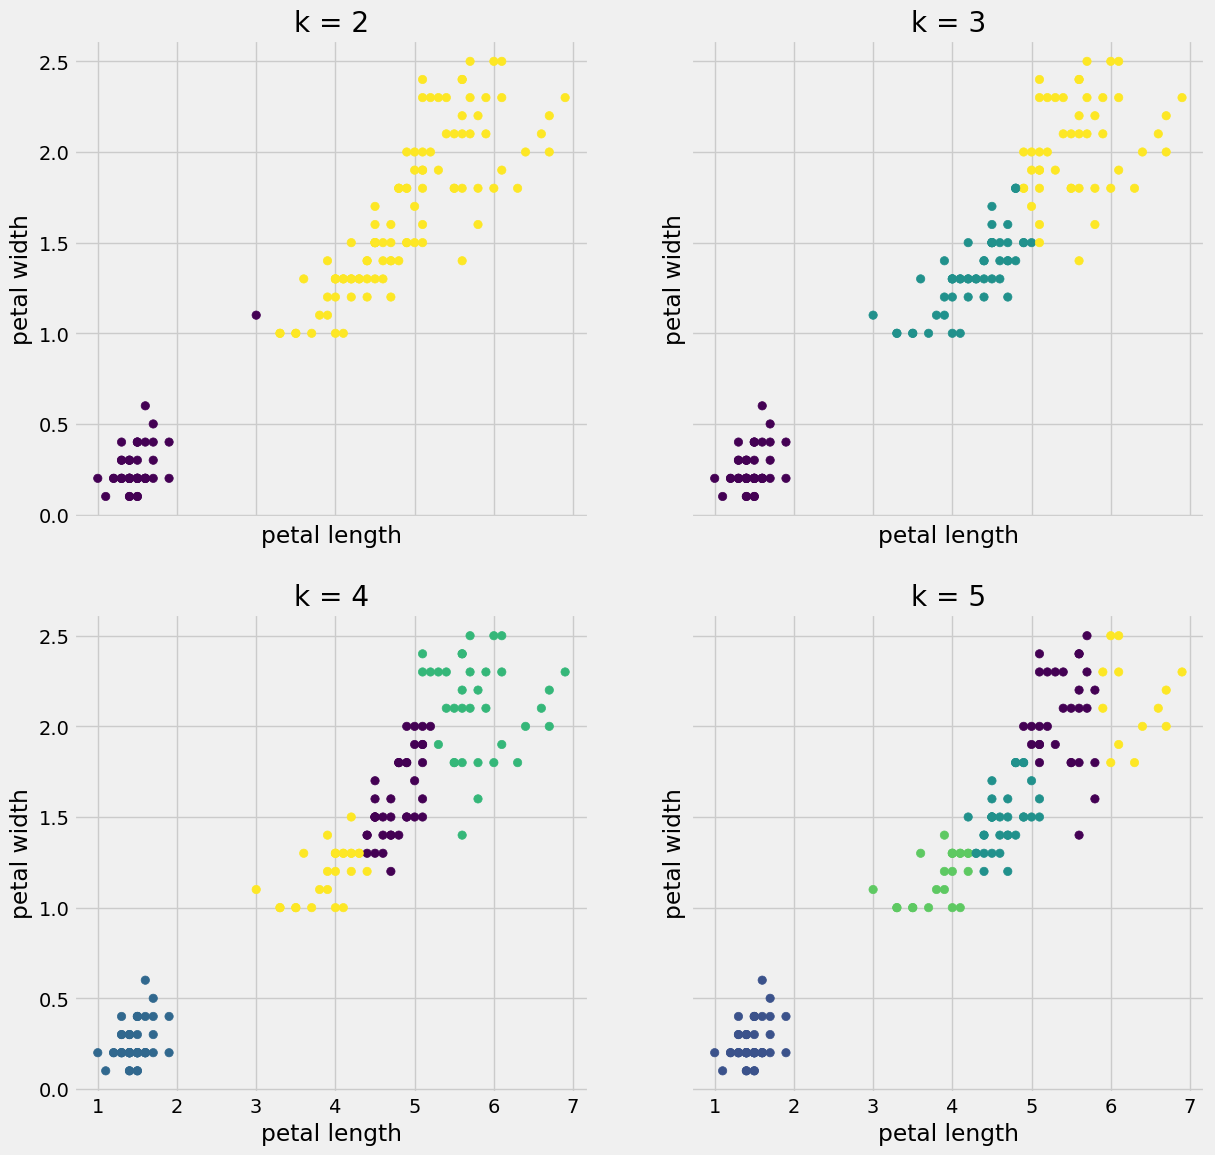

In [19]:
fig, axs = plt.subplots(
    2, 2, figsize=(13, 13), 
    sharex=True, 
    sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_length, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal length', ylabel='petal width')

### Clustering on 3 features

In [21]:
X = iris[['petal_length', 'petal_width', 'sepal_length']]
X.head()

,petal_length,petal_width,sepal_length
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0


In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [24]:
iris['three_feature_cluster'] = clusters
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,three_feature_cluster
1,5.1,3.5,1.4,0.2,setosa,2,1
2,4.9,3.0,1.4,0.2,setosa,2,1
3,4.7,3.2,1.3,0.2,setosa,2,1
4,4.6,3.1,1.5,0.2,setosa,2,1
5,5.0,3.6,1.4,0.2,setosa,2,1


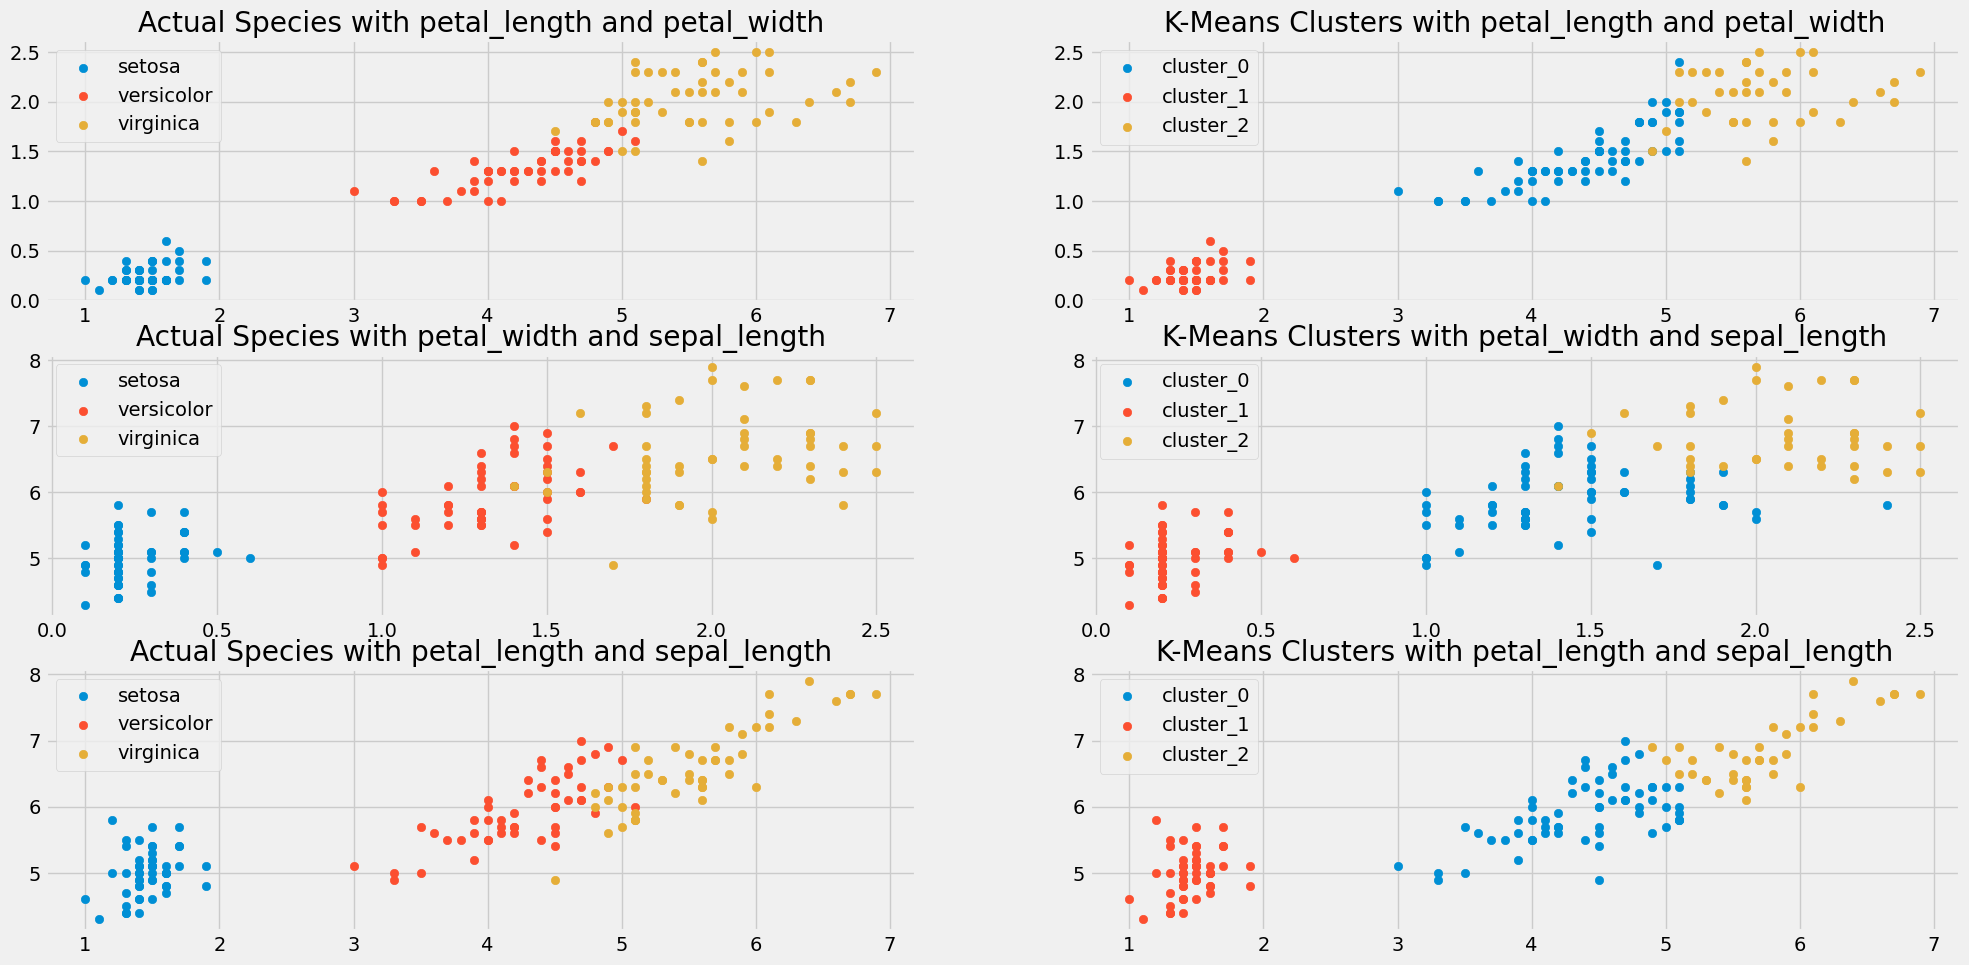

In [26]:
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in iris.groupby('species'):
    axs[0,0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with petal_length and petal_width')
    
for cluster_n in iris.three_feature_cluster.sort_values().unique():
    axs[0,1].scatter(iris[iris.three_feature_cluster == cluster_n].petal_length, iris[iris.three_feature_cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with petal_length and petal_width")

for species, subset in iris.groupby('species'):
    axs[1,0].scatter(subset.petal_width, subset.sepal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with petal_width and sepal_length')

for cluster_n in iris.three_feature_cluster.sort_values().unique():
    axs[1,1].scatter(iris[iris.three_feature_cluster == cluster_n].petal_width, iris[iris.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with petal_width and sepal_length")

for species, subset in iris.groupby('species'):
    axs[2,0].scatter(subset.petal_length, subset.sepal_length, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with petal_length and sepal_length')

for cluster_n in iris.three_feature_cluster.sort_values().unique():
    axs[2,1].scatter(iris[iris.three_feature_cluster == cluster_n].petal_length, iris[iris.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with petal_length and sepal_length")

plt.show()

## Clustering the Mall Dataset

### Bring in our modeling data

In [31]:
mall = w.mall()

File exists, pulling from system.


In [33]:
train, validate, test = w.splitter(mall)

Dataframe: (200, 5) 100%
Train: (128, 5) | ~60%
Validate: (32, 5) | ~20%
Test: (40, 5) | ~20%


In [34]:
X = train[['age', 'annual_income']]
X.head()

,age,annual_income
129,38,71
190,34,103
35,21,33
130,47,71
147,32,77


### Create our clusters

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 3, 4, 1, 1, 0, 0, 3, 3, 4, 1, 0, 0, 4, 1, 0, 1, 0, 1, 1, 3, 0,
       3, 4, 1, 1, 4, 2, 4, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 4, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 4, 3, 0, 2, 1, 1, 2, 3, 0, 4, 3, 1, 4, 2,
       4, 0, 0, 3, 0, 4, 4, 2, 1, 2, 2, 4, 0, 4, 1, 2, 1, 4, 0, 1, 3, 1,
       1, 3, 2, 2, 4, 0, 4, 0, 1, 1, 4, 3, 2, 2, 1, 4, 1, 2, 0, 4, 1, 0,
       0, 2, 2, 1, 1, 4, 4, 2, 0, 2, 1, 0, 0, 1, 4, 3, 4, 0], dtype=int32)

### Add our clusters onto the training set

In [37]:
train['cluster'] = clusters
train.head()

,customer_id,gender,age,annual_income,spending_score,cluster
129,130,Male,38,71,75,1
190,191,Female,34,103,23,3
35,36,Female,21,33,81,4
130,131,Male,47,71,9,1
147,148,Female,32,77,74,1


### Visualize our clusters

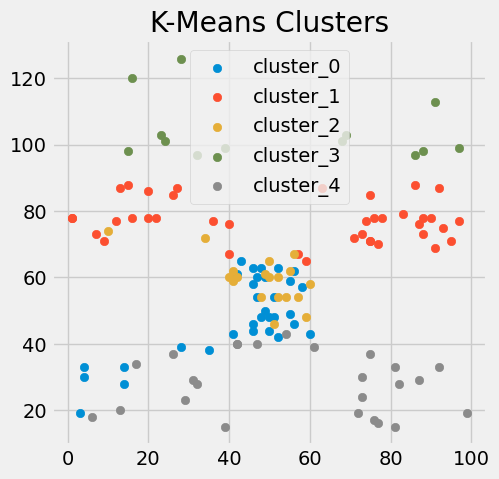

In [38]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster.sort_values().unique():
    plt.scatter(train[train.cluster == cluster_n].spending_score, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

### Use the elbow method to determine if we have the appropriate number of clusters

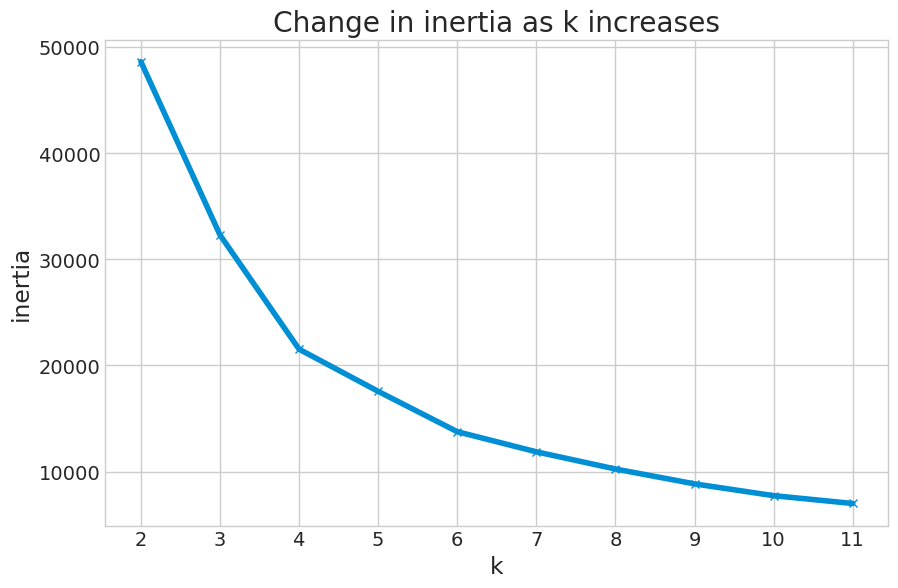

In [39]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

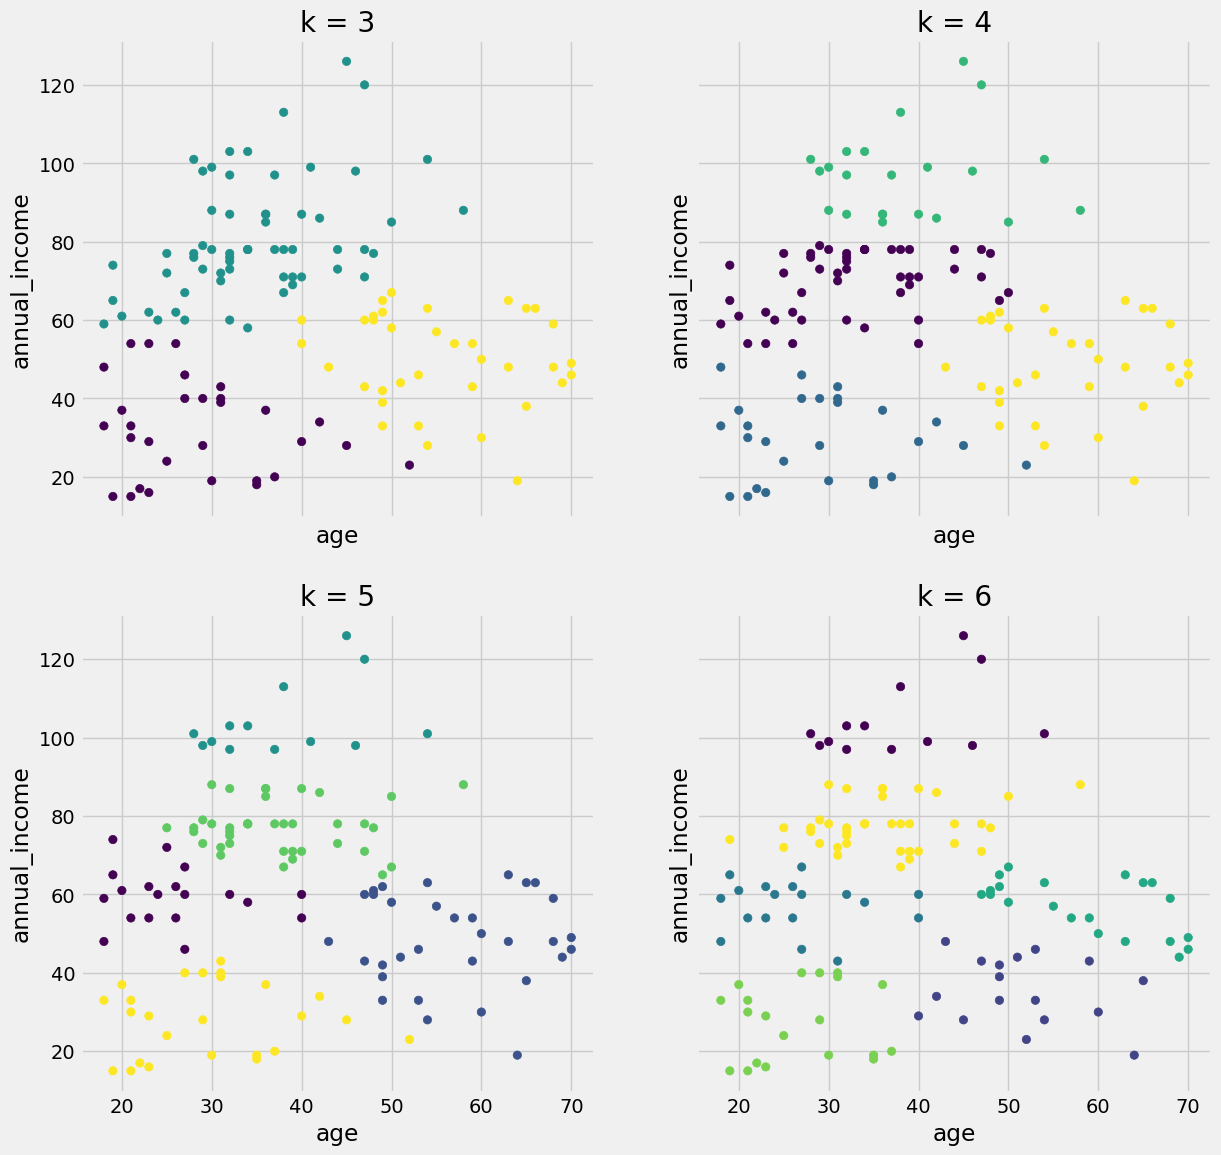

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

## Clustering the Scaled Mall Dataset (Does scaling make a difference?)

In [41]:
train_scaled = train.drop(columns=['annual_income','age', 'cluster']).copy()

In [42]:
train_scaled.head()

,customer_id,gender,spending_score
129,130,Male,75
190,191,Female,23
35,36,Female,81
130,131,Male,9
147,148,Female,74


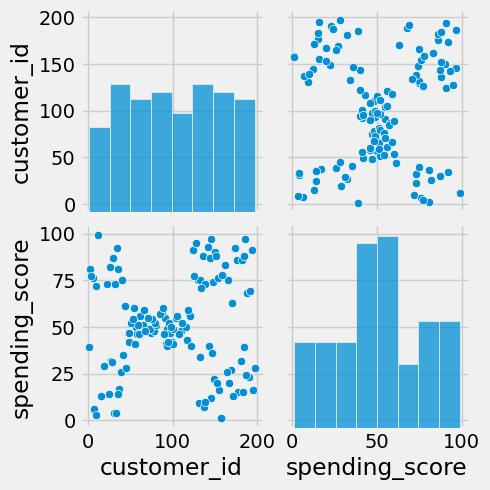

In [43]:
sns.pairplot(train_scaled)

In [45]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([2, 1, 0, 3, 2, 4, 4, 1, 1, 0, 2, 4, 3, 0, 2, 4, 1, 3, 2, 3, 1, 3,
       1, 0, 2, 1, 0, 3, 0, 2, 2, 2, 3, 2, 4, 4, 2, 3, 2, 3, 1, 0, 4, 2,
       4, 1, 3, 3, 4, 4, 3, 2, 0, 1, 3, 2, 2, 1, 2, 1, 4, 0, 1, 2, 0, 2,
       0, 3, 4, 1, 3, 0, 0, 0, 2, 3, 2, 0, 4, 0, 2, 2, 2, 0, 4, 2, 1, 1,
       2, 1, 2, 2, 0, 4, 0, 3, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 4, 0, 2, 3,
       3, 2, 2, 2, 1, 0, 0, 2, 4, 2, 3, 4, 3, 2, 4, 1, 0, 3], dtype=int32)

In [46]:
train_scaled = train_scaled.assign(cluster=clusters)
# train_scaled.head()

In [47]:
train_scaled = train_scaled.assign(spending_score = train.loc[:,'spending_score'].copy())

In [48]:
plt.figure(figsize=(5, 5))

for cluster_n in train_scaled.cluster.sort_values().unique():
    plt.scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income_scaled, 
                label=f'cluster_{cluster_n}'
               )

plt.legend()
plt.title("K-Means Clusters")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'annual_income_scaled'

<Figure size 500x500 with 0 Axes>